In [2]:
import acoular
ts = acoular.TimeSamples( name="three_sources.h5" )
ps = acoular.PowerSpectra( time_data=ts, block_size=128, window="Hanning" )
from os import path
micgeofile = path.join(path.split(acoular.__file__)[0],'xml','array_64.xml')
mg = acoular.MicGeom( from_file=micgeofile )
rg = acoular.RectGrid( x_min=-0.2, x_max=0.2,
                       y_min=-0.2, y_max=0.2,
                       z=0.3, increment=0.01 )
st = acoular.SteeringVector( grid=rg, mics=mg )
bb = acoular.BeamformerBase( freq_data=ps, steer=st )

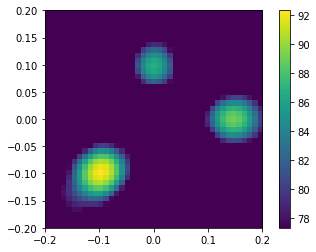

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
Lm = acoular.L_p( bb.synthetic(8000,3) )
plt.figure()
plt.imshow( Lm.T, origin="lower", vmin=Lm.max()-15, extent=rg.extend() )
plt.colorbar();

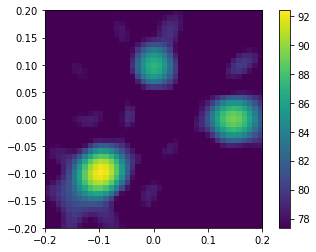

In [11]:
bb.r_diag = False
Lm = acoular.L_p( bb.synthetic(8000,3) )
plt.figure()
plt.imshow( Lm.T, origin="lower", vmin=Lm.max()-15, extent=rg.extend() )
plt.colorbar();

[('three_sources_cache.h5', 8)]


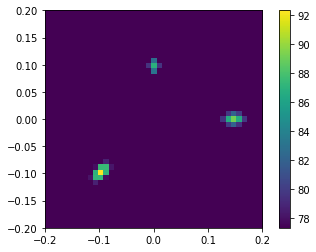

In [18]:
bf = acoular.BeamformerFunctional( freq_data=ps, steer=st, gamma=50  )
Lm = acoular.L_p( bf.synthetic(8000,3) )
plt.figure()
plt.imshow( Lm.T, origin="lower", vmin=Lm.max()-15, extent=rg.extend() )
plt.colorbar();

[('three_sources_cache.h5', 10)]


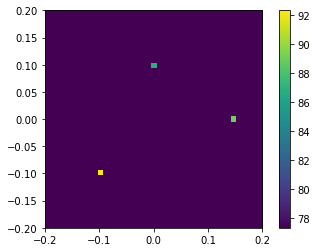

In [20]:
bs = acoular.BeamformerCleansc( freq_data=ps, steer=st )
Lm = acoular.L_p( bs.synthetic( 8000, 3) )
plt.figure()
plt.imshow( Lm.T, origin="lower", vmin=Lm.max()-15, extent=rg.extend() )
plt.colorbar();